<a href="https://colab.research.google.com/github/thewati/TopicModellingTxtGen/blob/main/SDG_TM_and_TG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Modelling**

In [1]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#let's see the fisrt few rows of the dataset
import pandas as pd  

#creating dataframe using pandas to read from drive
df = pd.read_csv('../content/drive/My Drive/osdg-community-data-v2022-10-01.csv', sep='\\t')
print(df.head(3))

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


                          "doi                           text_id  \
0  "10.6027/9789289342698-7-en  00021941702cd84171ff33962197ca1f   
1        "10.18356/eca72908-en  00028349a7f9b2485ff344ae44ccfd6b   
2  "10.1787/9789264289062-4-en  0004eb64f96e1620cd852603d9cbe4d4   

                                                text  sdg  labels_negative  \
0  ""From a gender perspective, Paulgaard points ...    5                1   
1  Labour legislation regulates maximum working h...   11                2   
2  The average figure also masks large difference...    3                1   

   labels_positive           agreement"  
0                8  0.7777777777777778"  
1                1  0.3333333333333333"  
2                8  0.7777777777777778"  


In [3]:
#filtering the 978 rows from the dataset under SDG15
sdg15df = df[df['sdg'] == 15]
sdg15df

,"""doi",text_id,text,sdg,labels_negative,labels_positive,"agreement"""
72,"""10.18356/0476b8f9-en",00807f106a220853aa9718a456be2814,These are comprehensive and contemporary in th...,15,0,3,"1.0"""
75,"""10.18356/e3c062fb-en",00846c887bf9f4c8006e2b13ed12bcb8,"Of mammals, four species are extinct at the na...",15,0,4,"1.0"""
103,"""10.18356/0543d374-en",00b5304d320dc25ad1918e09308db149,The forests and OWL are especially remarkable ...,15,0,3,"1.0"""
216,"""10.1787/e0796071-en",01a5a090750f0fdd46a39a17b3a7a8c2,Une telle decomposition par categorie UICN n'e...,15,1,4,"0.6"""
253,"""10.6027/9789289329651-8-en",01fd4e7f8cf56c08982f8f245e3d9f3a,"However, we lack knowledge of the more specifi...",15,1,9,"0.8"""
...,...,...,...,...,...,...,...
37341,"""10.1787/9789264117563-9-en",fe87c140bfb7ec895a03204186f0ebe0,Some 6 600 birds have been killed in collision...,15,1,8,"0.7777777777777778"""
37412,"""10.6027/9789289329163-7-en",ff10d4ac80a2be3872c3c9765aec211c,"However, for the Kyoto reporting, the areas un...",15,1,3,"0.5"""
37419,"""10.18356/d7485e6e-en",ff1adf0a434fd1bc70d8401a7e8ab0f5,Among MoNP departments and subordinate institu...,15,1,8,"0.7777777777777778"""
37528,"""10.1787/9789264227385-8-en",ffb6d03706fcb508aa52c1c4765b0673,The ratio of natural regeneration to planting ...,15,0,4,"1.0"""


In [4]:
#install pyLDAvis for visualization
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=d9aa3ba0b6c3e81cd387a5ee1df918dfcab9fec384df36e40a9bd2a391677274
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=89965bd0d1309019511071645fc43292bce4fecd7181b319abeba7c772ada396
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [5]:
#import different libraries that will be used along the way
import gensim
from gensim import corpora, models
import pyLDAvis.gensim_models
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
import warnings
warnings.simplefilter('ignore')
from itertools import chain

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [6]:
#cleaning the data by removing stopwords, lemmatizing, reducing to lower characters e.t.c
stopw = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def cleantxt(text):
    no_stopw = ' '.join([word for word in text.lower().split() if word not in stopw])
    no_punc = ''.join(ch for ch in no_stopw if ch not in exclude)
    normalised = ' '.join([lemma.lemmatize(word) for word in no_punc.split()])
    return normalised.split()

#showing cleaned text in new column called 'cleaned_text'
sdg15df['cleaned_text']=sdg15df['text'].apply(cleantxt)
sdg15df

,"""doi",text_id,text,sdg,labels_negative,labels_positive,"agreement""",cleaned_text
72,"""10.18356/0476b8f9-en",00807f106a220853aa9718a456be2814,These are comprehensive and contemporary in th...,15,0,3,"1.0""","[comprehensive, contemporary, thinking, approa..."
75,"""10.18356/e3c062fb-en",00846c887bf9f4c8006e2b13ed12bcb8,"Of mammals, four species are extinct at the na...",15,0,4,"1.0""","[mammal, four, specie, extinct, national, leve..."
103,"""10.18356/0543d374-en",00b5304d320dc25ad1918e09308db149,The forests and OWL are especially remarkable ...,15,0,3,"1.0""","[forest, owl, especially, remarkable, term, ve..."
216,"""10.1787/e0796071-en",01a5a090750f0fdd46a39a17b3a7a8c2,Une telle decomposition par categorie UICN n'e...,15,1,4,"0.6""","[une, telle, decomposition, par, categorie, ui..."
253,"""10.6027/9789289329651-8-en",01fd4e7f8cf56c08982f8f245e3d9f3a,"However, we lack knowledge of the more specifi...",15,1,9,"0.8""","[however, lack, knowledge, specific, distribut..."
...,...,...,...,...,...,...,...,...
37341,"""10.1787/9789264117563-9-en",fe87c140bfb7ec895a03204186f0ebe0,Some 6 600 birds have been killed in collision...,15,1,8,"0.7777777777777778""","[6, 600, bird, killed, collision, aircraft, bi..."
37412,"""10.6027/9789289329163-7-en",ff10d4ac80a2be3872c3c9765aec211c,"However, for the Kyoto reporting, the areas un...",15,1,3,"0.5""","[however, kyoto, reporting, area, subcategory,..."
37419,"""10.18356/d7485e6e-en",ff1adf0a434fd1bc70d8401a7e8ab0f5,Among MoNP departments and subordinate institu...,15,1,8,"0.7777777777777778""","[among, monp, department, subordinate, institu..."
37528,"""10.1787/9789264227385-8-en",ffb6d03706fcb508aa52c1c4765b0673,The ratio of natural regeneration to planting ...,15,0,4,"1.0""","[ratio, natural, regeneration, planting, incre..."


In [7]:
#creating dictionary
dictionary = corpora.Dictionary(sdg15df['cleaned_text'])
#Total non-zeroes in the Bag of Words matrix
print(dictionary.num_nnz)

44340


In [8]:
#creating the bag of words matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in sdg15df['cleaned_text'] ]
print(len(doc_term_matrix))

978


In [9]:
#fitting on model
lda = gensim.models.ldamodel.LdaModel

#take down topics from 15 to 9
num_topics=18 

#eta can be set to auto to learn assymetric prior
#I have started by using default values for alpha and eta, where alpha=0.1, and eta=0.01
%time ldamodel = lda(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=50, minimum_probability=0)

CPU times: user 48.5 s, sys: 398 ms, total: 48.9 s
Wall time: 51 s


In [10]:
#showing topics and their probabilities
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.022*"forest" + 0.011*"area" + 0.009*"sector" + 0.008*"national" + 0.008*"protected" + 0.008*"country" + 0.007*"development" + 0.007*"carbon" + 0.006*"system" + 0.006*"also"'),
 (1,
  '0.015*"per" + 0.015*"ha" + 0.011*"hectare" + 0.011*"area" + 0.010*"forest" + 0.010*"tsh" + 0.008*"park" + 0.007*"year" + 0.007*"cost" + 0.006*"household"'),
 (2,
  '0.014*"biodiversity" + 0.013*"national" + 0.009*"also" + 0.008*"resource" + 0.008*"committee" + 0.007*"convention" + 0.006*"meeting" + 0.006*"forest" + 0.006*"made" + 0.005*"project"'),
 (3,
  '0.011*"forest" + 0.010*"country" + 0.008*"carbon" + 0.006*"per" + 0.006*"cent" + 0.005*"development" + 0.005*"national" + 0.005*"deforestation" + 0.004*"emission" + 0.004*"eu"'),
 (4,
  '0.009*"specie" + 0.007*"percent" + 0.007*"biodiversity" + 0.006*"usd" + 0.006*"million" + 0.005*"region" + 0.005*"sector" + 0.005*"contribution" + 0.005*"area" + 0.005*"billion"'),
 (5,
  '0.017*"forest" + 0.014*"area" + 0.006*"item" + 0.006*"protected" + 0.00

In [11]:
#showing intertopic distance map
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

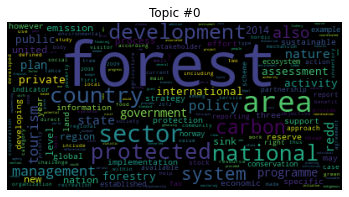

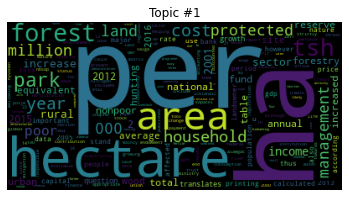

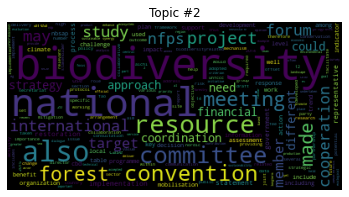

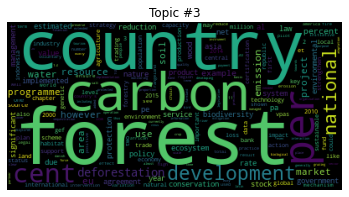

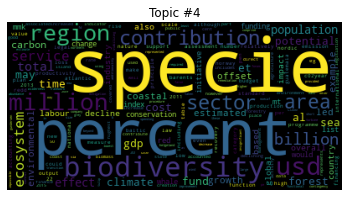

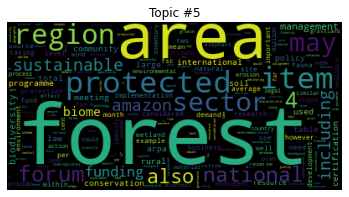

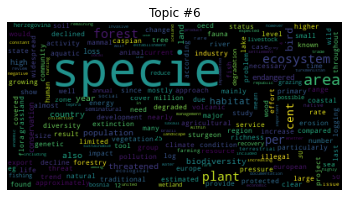

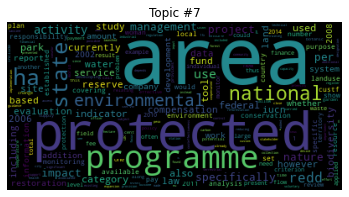

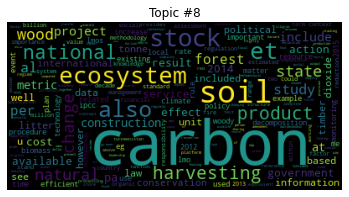

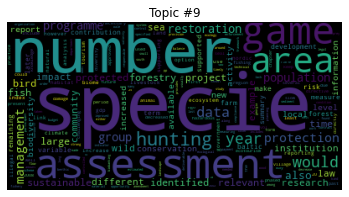

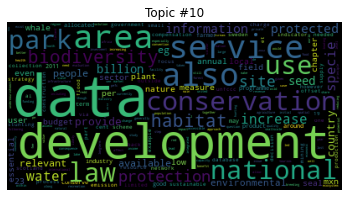

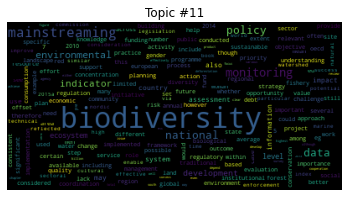

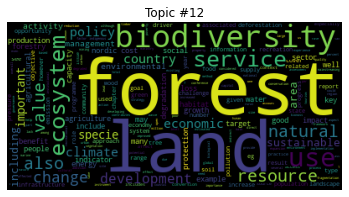

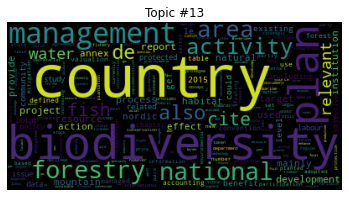

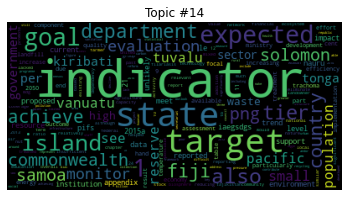

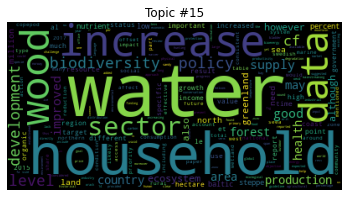

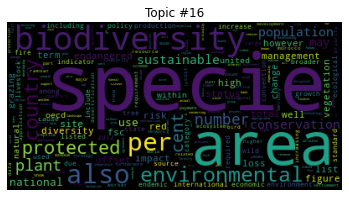

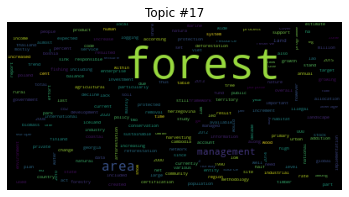

In [18]:
#generating a word cloud of the topics
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud(relative_scaling = 1.0).fit_words(dict(ldamodel.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

# **Text Generation**

In [21]:
#We use EleutherAI/gpt-neo-1.3B which is a replication of the GPT-3 architecture
#getting pytorch and transformers
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
#We use EleutherAI/gpt-neo-1.3B which is a replication of the GPT-3 architecture
#import the pipeline and load the generator
from transformers import pipeline

txtgenerator = pipeline('text-generation', model='EleutherAI/gpt-neo-1.3B')

Downloading:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/200 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

In [30]:
#I got the following topics from topic 0: forest, national, development, protected. To give a little context, I used a sentence
topic_issues = 'forests must be protected'

In [31]:
#used a maximum word length of 100
result = txtgenerator(topic_issues, max_length=100, do_sample=True, temperature=0.9)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [32]:
print(result[0]['generated_text'])

forests must be protected from the incursion of the winter winds.
To secure these forests, the practice of planting trees in the
field in the early spring is adopted. The usual method of planting
trees in the vicinity of the home farmhouse, is by the method of
mosaic terracing--that is to say, by the arrangement of trees in
various directions with the aid of poles. The method is generally
adopted for the purpose of protecting the farms


In [ ]:
#Simply amazing isn't it? I gave the model some text and it gave us a bunch of text from related to it.